[ mutation ratio: 0.984: : 100.00%|██████████| phi: 1.00000/1.0 [00:03<00:00


marginal log likelihood = -23.30660050971325
parameter means = {'K': 1.7252951645968935, 'g': 4.586358978331318}
true parameters = {'K': 1.67, 'g': 4.62}


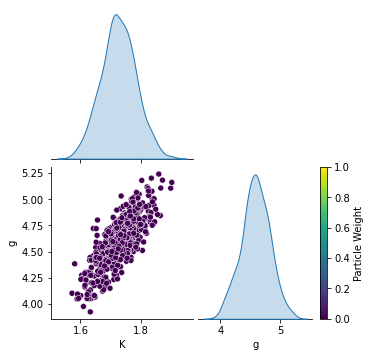

In [1]:
import numpy as np

from pathlib import Path
from scipy.stats import uniform

from spring_mass_model import SpringMassModel
from smcpy.utils.plotter import plot_pairwise
from smcpy import AdaptiveSampler as Sampler
from smcpy import VectorMCMC, VectorMCMCKernel


# Initialize model
state0 = [0., 0.]  # initial conditions
measure_t_grid = np.arange(0., 5., 0.2)  # time
model = SpringMassModel(state0, measure_t_grid)

# Load data
std_dev = 0.5
displacement_data = np.genfromtxt('noisy_data.txt')

# Define prior distributions & MCMC kernel
priors = [uniform(0, 10), uniform(0, 10)]
vector_mcmc = VectorMCMC(model.evaluate, displacement_data, priors, std_dev)
mcmc_kernel = VectorMCMCKernel(vector_mcmc, param_order=('K', 'g'))

# SMC sampling
smc = Sampler(mcmc_kernel)
step_list, mll_list = smc.sample(num_particles=500,
                                 num_mcmc_samples=5,
                                 target_ess=0.8)

# Display results
print(f'marginal log likelihood = {mll_list[-1]}')
print(f'parameter means = {step_list[-1].compute_mean()}')
print("true parameters = {'K': 1.67, 'g': 4.62}")

plot_pairwise(step_list[-1].params, step_list[-1].weights, save=True,
              param_names=['K', 'g'])

In [4]:
len(np.genfromtxt('noisy_data.txt'))

25

In [5]:
priors